### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("../../data_analysis/")
import helper as hp

In [3]:
savepath = "C06_replot_second_round/"
os.makedirs(savepath, exist_ok=True)

In [4]:
df = pd.read_excel(f"{savepath}20240321_DAN_ELISA_plate2_MM.xlsx", header=None)
df.head(2) 

,0,1,2
0,seq4,CCQCCCLCCCFCCCCCCELFPK,0.272
1,seq74,QACAQCLCAAFSQYAKVELFPK,0.263


In [5]:
len(df)

96

In [6]:
path = "C01_elisa_extract_top_seq/esm1v.csv"
df_ml = pd.read_csv(path)
df_ml.head(2)

,AA
0,CCQCCCLCCAFCCCCKCELCPK
1,ACQVQHCCCACCCYCCVCCFCC


In [7]:
len(df_ml)

46

In [8]:
df['label'] = df[1].apply(lambda x: 'green' if x in df_ml['AA'].values else 'dimgray')
df.head(2)

,0,1,2,label
0,seq4,CCQCCCLCCCFCCCCCCELFPK,0.272,green
1,seq74,QACAQCLCAAFSQYAKVELFPK,0.263,dimgray


In [9]:
KP = "GGVCGPSPPCITT"

In [10]:
df.loc[df[1] == KP, 'label'] = 'blue'

In [11]:
_lables = df['label'].to_list()
_lables.count('green')

46

In [12]:
assert _lables.count('green') == len(df_ml)

In [13]:
df.loc[df[0] == 'T1_85', 'label'] = 'black'
df.loc[df[0] == 'T1_56', 'label'] = 'black'

/var/folders/_d/ms_z9zhx5s5f6s0nrt42m9ph0000gn/T/ipykernel_1351/413093988.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')


[]

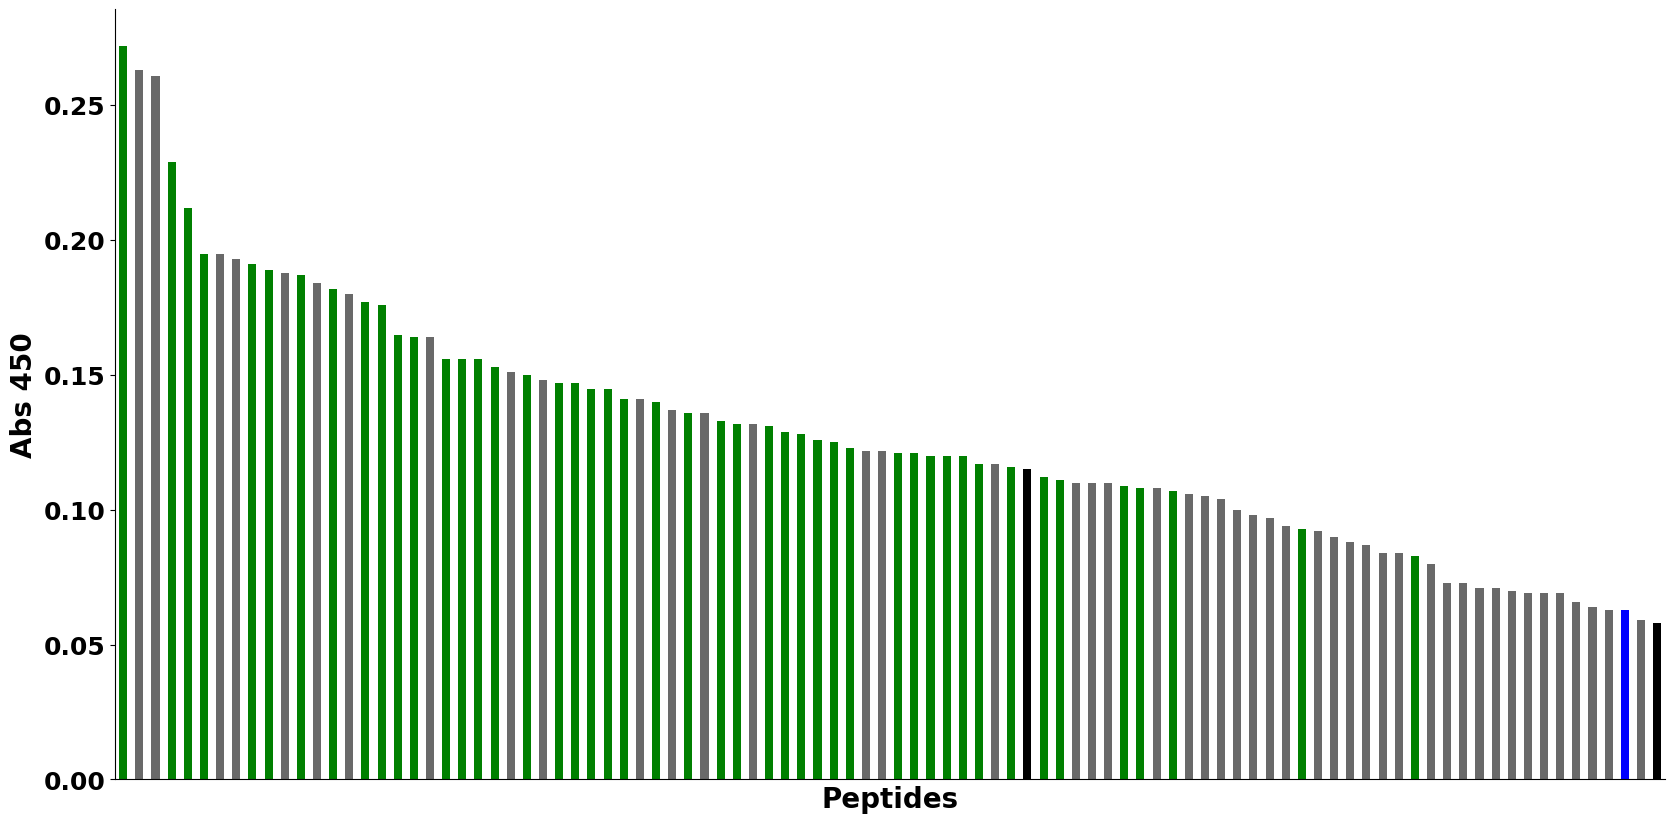

In [14]:
ax = df.plot(x=0, y=2, 
             kind='bar', 
             color=df['label'], 
             figsize=(20, 10),
             fontsize=18,
             legend=False)

size = 20
ax.set_xlabel('Peptides', fontsize=size, fontweight='bold')
ax.set_ylabel('Abs 450', fontsize=size, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])